<a href="https://colab.research.google.com/github/Kozhedu/Statistics--Python/blob/main/%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.graph_objects as go

In [2]:
df = pd.read_csv("2019.csv")
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
df = df.rename(columns= {"Overall rank" : "Общий рейтинг", 
                         "Country or region" : "Страна или Регион" ,
                         "Score" : "Счет" ,
                         "GDP per capita" : "ВВП на душу населения" ,
                         "Social support" : "Социальная поддержка" ,
                         "Healthy life expectancy" : "Ожидаемая продолжительность здоровой жизни" ,
                         "Freedom to make life choices" : "Свобода делать жизненный выбор" ,
                         "Generosity" : "Щедрость" ,
                         "Perceptions of corruption" : "Восприятие коррупции" })

In [4]:
df.head(2)

,Общий рейтинг,Страна или Регион,Счет,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода делать жизненный выбор,Щедрость,Восприятие коррупции
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Общий рейтинг                               156 non-null    int64  
 1   Страна или Регион                           156 non-null    object 
 2   Счет                                        156 non-null    float64
 3   ВВП на душу населения                       156 non-null    float64
 4   Социальная поддержка                        156 non-null    float64
 5   Ожидаемая продолжительность здоровой жизни  156 non-null    float64
 6   Свобода делать жизненный выбор              156 non-null    float64
 7   Щедрость                                    156 non-null    float64
 8   Восприятие коррупции                        156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df.describe()

,Общий рейтинг,Счет,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода делать жизненный выбор,Щедрость,Восприятие коррупции
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [7]:
top10 = df.head(10)
top10

,Общий рейтинг,Страна или Регион,Счет,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода делать жизненный выбор,Щедрость,Восприятие коррупции
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [8]:
tail10 = df.tail(10)
tail10

,Общий рейтинг,Страна или Регион,Счет,ВВП на душу населения,Социальная поддержка,Ожидаемая продолжительность здоровой жизни,Свобода делать жизненный выбор,Щедрость,Восприятие коррупции
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [9]:
cols = ['ВВП на душу населения', 'Социальная поддержка',
       'Ожидаемая продолжительность здоровой жизни', 'Свобода делать жизненный выбор',
       'Щедрость','Восприятие коррупции']

In [10]:
df_top10 = pd.melt(top10, id_vars=['Страна или Регион'], 
                  value_vars=cols, 
                  var_name='Наименование', 
                  value_name='Значение')

In [11]:
df_tail10 = pd.melt(tail10, id_vars=['Страна или Регион'], 
                  value_vars=cols, 
                  var_name='Наименование', 
                  value_name='Значение')

In [12]:
df_bx = pd.melt(df, id_vars=['Страна или Регион'], 
                  value_vars=cols, 
                  var_name='Наименование', 
                  value_name='Значение')

# 1. Boxplot

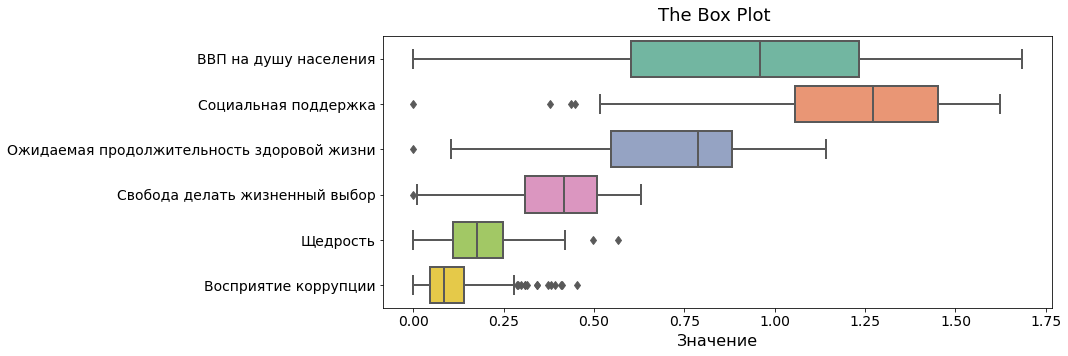

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.boxplot(x='Значение', y='Наименование', data=df_bx, linewidth=2, fliersize=6, palette='Set2')
plt.title('The Box Plot ', fontsize = 18, pad=15)
ax.set_xlabel("Значение", fontsize=16, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=14)

По всем странам имеется довольно серьезный разброс значений по показателям, которые зависят от счастья. Посмотрим отдельно топ10 самых счастливых стран, и топ10 самых несчастных.

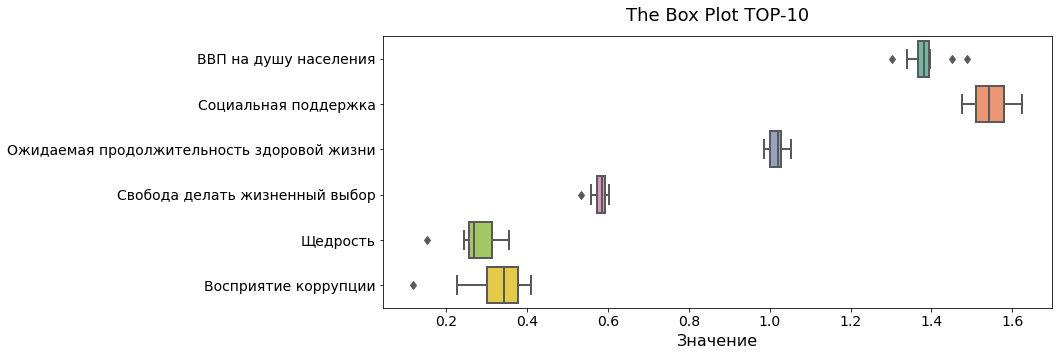

In [14]:

fig, ax = plt.subplots(figsize=(12,5))

#plt.subplot(1, 2, 1)

ax = sns.boxplot(x='Значение', y='Наименование', data=df_top10, linewidth=2, fliersize=6, palette='Set2')

plt.title('The Box Plot TOP-10', fontsize = 18, pad=15)
ax.set_xlabel("Значение", fontsize=16, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=14)

plt.show()


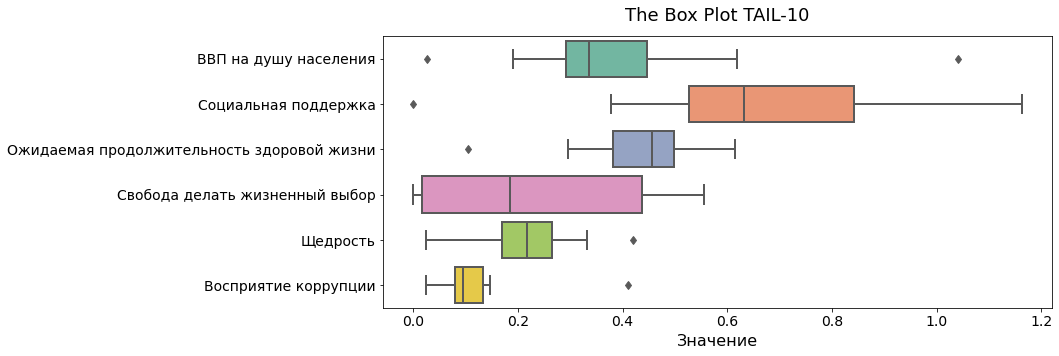

In [15]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.boxplot(x='Значение', y='Наименование', data=df_tail10, linewidth=2, fliersize=6, palette='Set2')

plt.title('The Box Plot TAIL-10', fontsize = 18, pad=15)
ax.set_xlabel("Значение", fontsize=16, labelpad=5)
ax.set_ylabel("")
ax.tick_params(labelsize=14)

plt.show()

Если сравнивать топ 10 самых счастливых и самых несчастных стран, то видно, что у несчастных в отличие от счастливых ВВП на душу населения значительно ниже, то же касается и прочих показателей, за исключением Щедрости – здесь хоть и есть отставание, но оно не большое – можно сделать вывод, что люди добры и щедры сами по себе не зависимо от достатка и наличия гос. гарантий. 

Так-же любопытно узнать, что восприятие коррупции в счастливых странах выше, чем в несчастных 

Посмотрим на показатели щедрости и Восприятия коррупции в разрезе стран 

# 2. Barplot

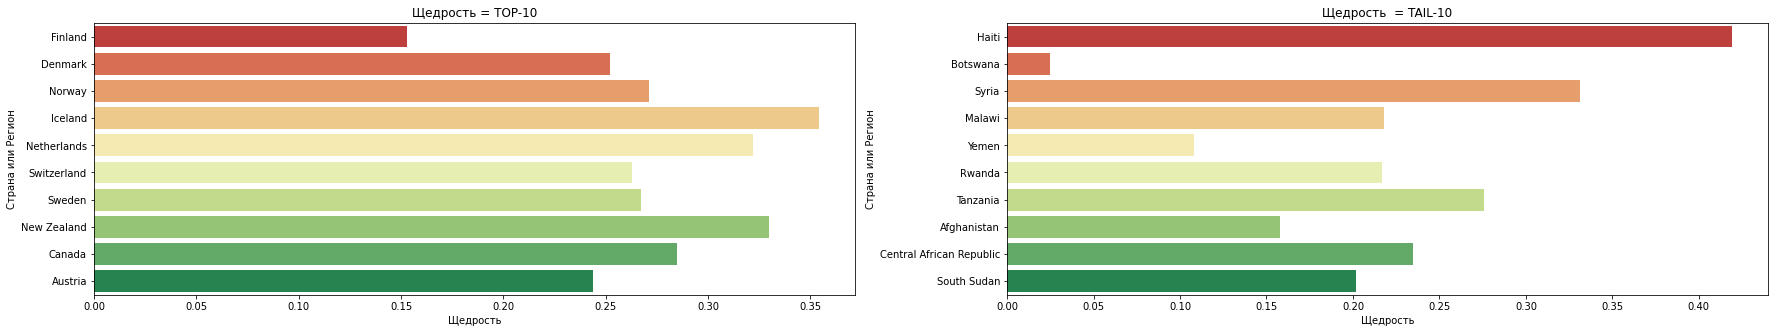

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (30,5))
plt.subplot(121)
plt.title('Щедрость = TOP-10')
sns.barplot(x='Щедрость',y='Страна или Регион',data=top10, palette="RdYlGn")

plt.subplot(122)
plt.title('Щедрость  = TAIL-10')
sns.barplot(x='Щедрость',y='Страна или Регион',data=tail10,palette="RdYlGn")


Любопытно, что показатель Щедрости в Гаити гораздо выше чем, например, в Финляндии или Новой Зеландии – хотя казалось –бы, чем счастливее люди, тем они должны быть более щедры.

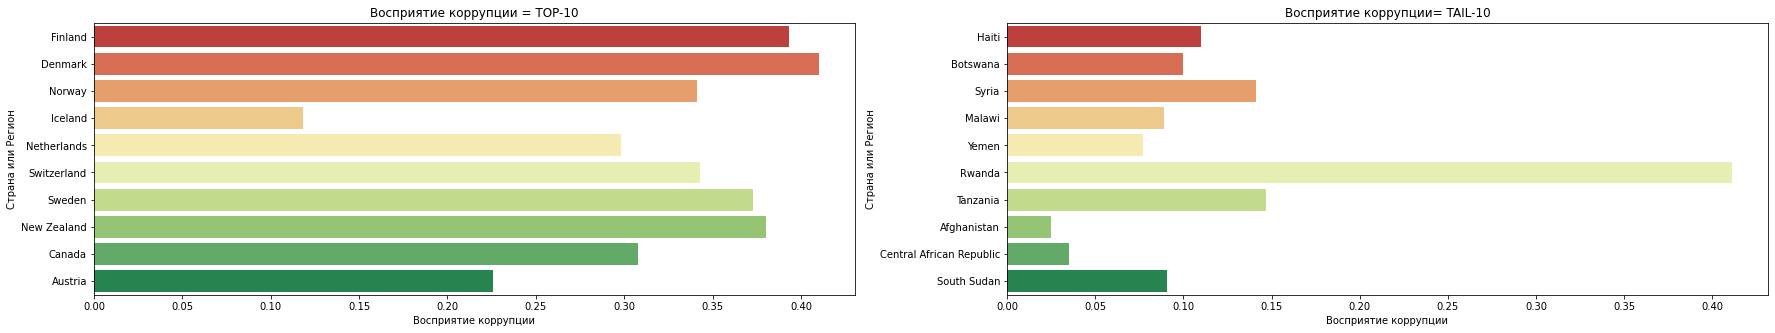

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (30,5))
plt.subplot(121)
plt.title('Восприятие коррупции = TOP-10')
sns.barplot(x='Восприятие коррупции',y='Страна или Регион',data=top10, palette="RdYlGn")

plt.subplot(122)
plt.title('Восприятие коррупции= TAIL-10')
sns.barplot(x='Восприятие коррупции',y='Страна или Регион',data=tail10,palette="RdYlGn")

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (30,5))
plt.subplot(121)
plt.title('Социальная поддержка = TOP-10')
sns.barplot(x='Социальная поддержка',y='Страна или Регион',data=top10, palette="RdYlGn")

plt.subplot(122)
plt.title('Социальная поддержка= TAIL-10')
sns.barplot(x='Социальная поддержка',y='Страна или Регион',data=tail10,palette="RdYlGn")

В разрезе стран у топ счастливых  восприятие коррупции значительно выше, чем у большинства топ несчастных.

# 3. Heatmap

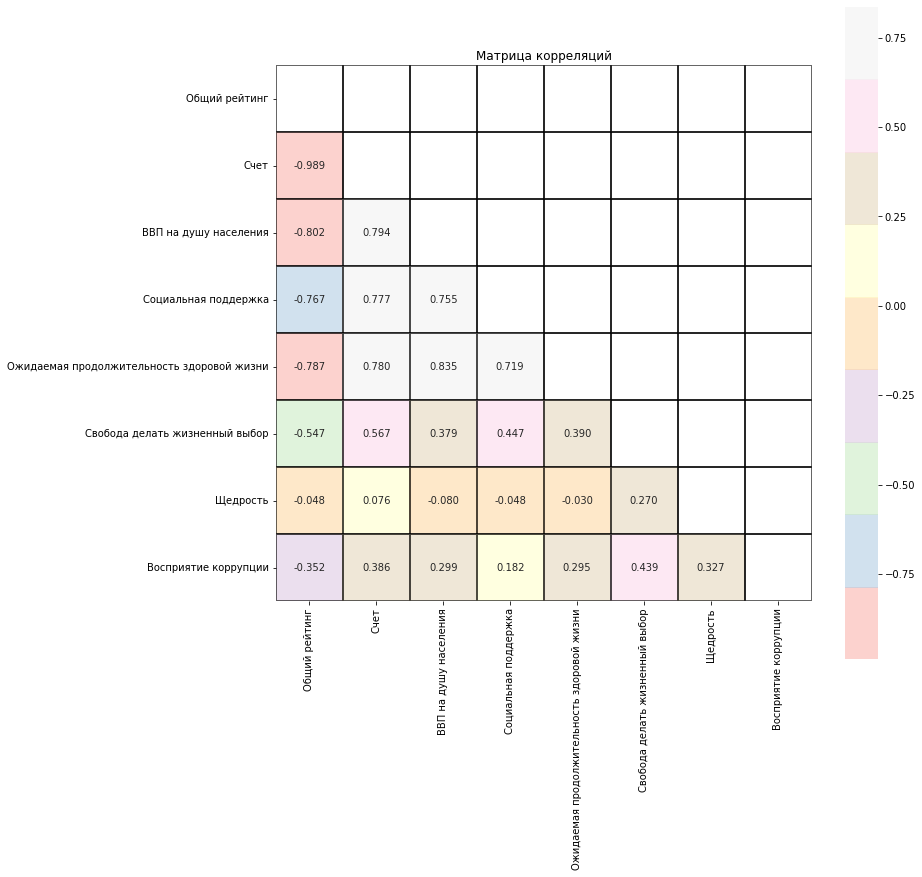

In [18]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df.corr(), annot=True, square=True, 
            cmap='Pastel1', fmt='.3f', linewidths=1, linecolor='black', alpha = 0.6, mask=np.triu(df.corr()))
plt.title('Матрица корреляций')
plt.show()

В целом на общий рейтинг в первую очередь влияет показатель Счет, ВВП на душу населения, затем Соц. Гарантии и Продолжительность жизни, самое последнее место  занимает Щедрость. Зависимость всех показателей - обратная (т.е. чем хуже показатель – тем общий рейтинг выше т.о. на самых первых местах указаны самые счастливые страны, а на самых последних – самые несчастные)

#4. Scatter plot matrix

In [19]:
par = df[["Счет",'ВВП на душу населения', 'Социальная поддержка','Свобода делать жизненный выбор', 'Щедрость','Восприятие коррупции']]

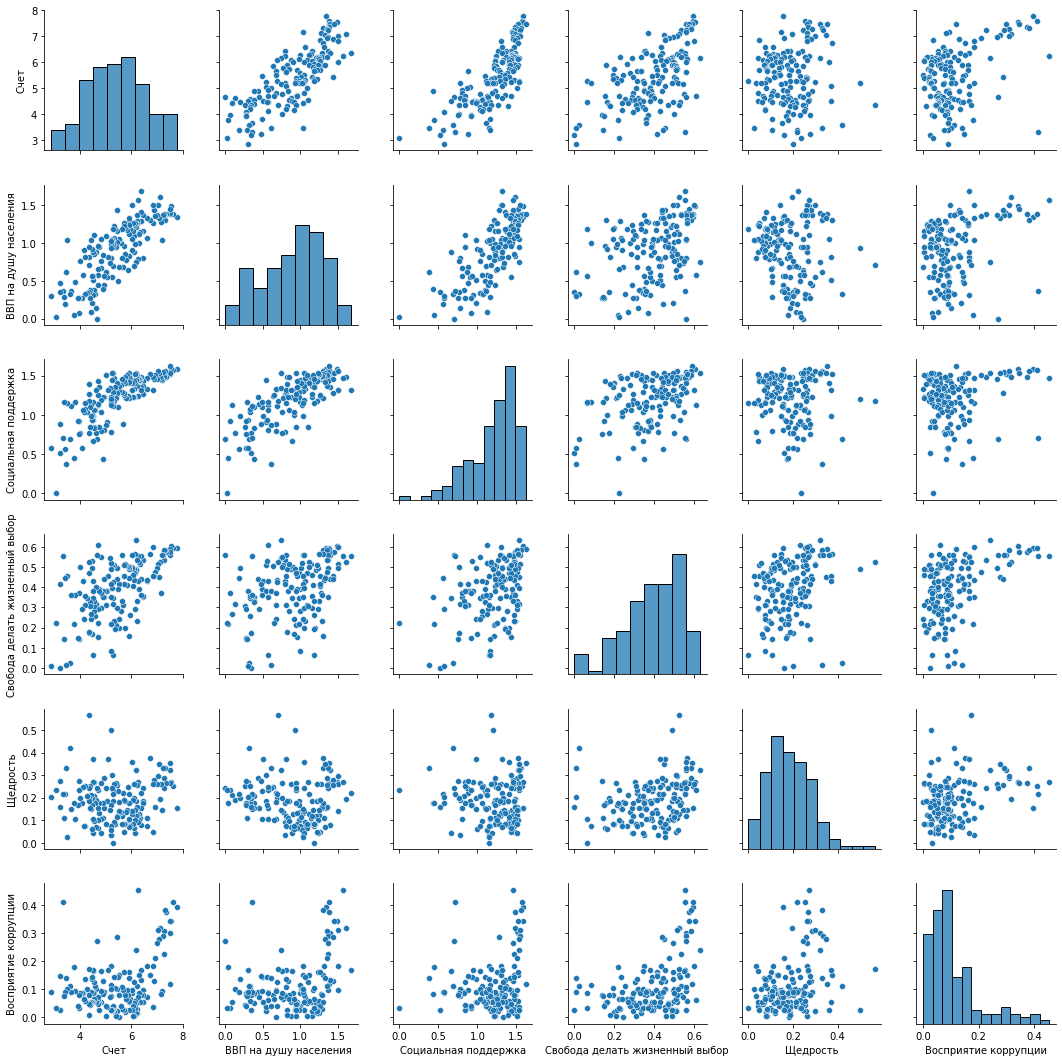

In [20]:
sns.pairplot(par)

Каких-то существенных зависимостей между показателями не выявлено

#5. GEO

In [21]:
full_vac = dict(
        type = 'choropleth',
        colorscale = 'Portland',
        locations = df['Страна или Регион'],
        locationmode = "country names",
        z = df['Общий рейтинг'],
        text = df['Страна или Регион'],
        colorbar = {'title' : 'Общий рейтинг'},
      )

layout = dict(title = 'Общий рейтинг', 
              geo = dict(projection = {'type':'robinson'}, 
                         showlakes = True, 
                         lakecolor = 'rgb(0,191,255)'))
fig = go.Figure(data = [full_vac], 
              layout = layout)
fig.show()

Как и ожидалось  - самые счастливые страны расположены в Европе,  Америке и Австралии. Самые несчастные – в Африке.